# packages

In [10]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [93]:
x,y=make_regression(n_samples=100,n_features=1,noise=6)
y=y+abs(y/3)

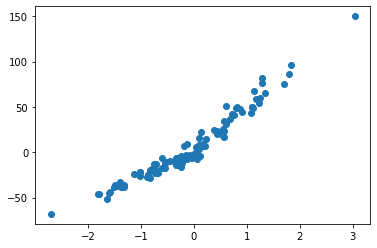

In [94]:
plt.scatter(x,y)

In [95]:
x.shape
y=y.reshape(100,1)

In [96]:
y.shape

(100, 1)

In [97]:
#matrix X
X=np.hstack((x**2,x,np.ones(x.shape)))
#theta
theta=np.random.rand(3,1)

# model

In [98]:
def model(X,theta):
    return X.dot(theta)

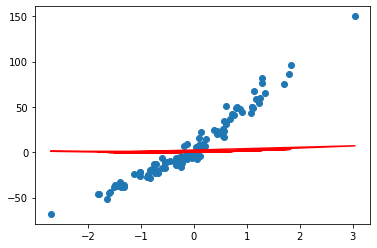

In [99]:
plt.plot(x,model(X,theta),c="r")
plt.scatter(x,y)

# cost function 

In [100]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [101]:
cost_function(X,y,theta)

690.1024393161414

# gradient descent

In [102]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [103]:
grad(X,y,theta)

array([[-13.35241686],
       [-33.77621323],
       [ -6.37803159]])

In [104]:
def grad_descent(X,y,theta,alpha,iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        theta=theta - alpha * grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta,cost_history

# implementation

In [105]:
theta_final,cost_history=grad_descent(X,y,theta,alpha=0.1,iterations=1000)

In [106]:
theta_final

array([[ 4.51582584],
       [37.78911895],
       [ 5.3568034 ]])

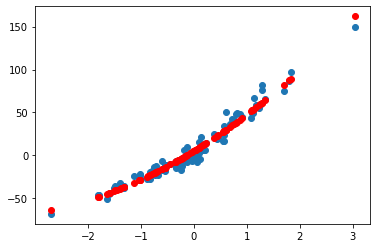

In [107]:
predictions=model(X,theta_final)
plt.scatter(x,y)
plt.scatter(x,predictions,c="r")

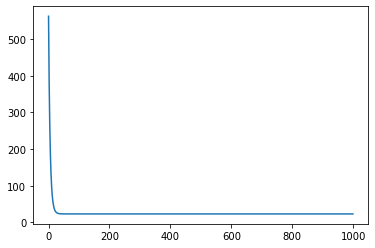

In [108]:
plt.plot(cost_history)


# coef R2 

In [109]:
def R2(y,predictions):
    u=((y-predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1- u/v

In [110]:
R2(y,predictions)

0.9671039315823158